## Importing Packages

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 22.6 MB 22.5 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 67.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345992 sha256=1da03c7a6a809cb01e948df8c8ecd8606aaade456e1dcbafd51dd9233fb5c333
  Stored in directory: /tmp/pip-ephem-wheel-ca

In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pycaret.regression import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
df = pd.read_csv('/content/corn yield.csv')

## Analysing Data

In [ ]:
df.head()

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"245,000",NaN
1,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",TOTAL,NOT SPECIFIED,"36,015,000",NaN
2,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"9,000",NaN
3,SURVEY,2015,YEAR,NaN,STATE,ALABAMA,1.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE",TOTAL,NOT SPECIFIED,15,NaN
4,SURVEY,2015,YEAR,NaN,STATE,ARIZONA,4.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"34,000",NaN


In [ ]:
df.isnull().sum()

Program                 0
Year                    0
Period                  0
Week Ending         23474
Geo Level               0
State                   0
State ANSI             34
Ag District         23474
Ag District Code    23474
County              23474
County ANSI         23474
Zip Code            23474
Region              23474
watershed_code          0
Watershed           23474
Commodity               0
Data Item               0
Domain                  0
Domain Category         0
Value                   0
CV (%)              23474
dtype: int64

In [ ]:
for i in df:
    print(i,df[i].value_counts(),sep="\n",end="\n")

Program
SURVEY    23474
Name: Program, dtype: int64
Year
2015    496
2012    483
2014    483
2013    376
1935    192
       ... 
1877     72
1878     72
1868     70
1867     70
1866     70
Name: Year, Length: 150, dtype: int64
Period
YEAR                   22352
YEAR - AUG FORECAST      264
YEAR - NOV FORECAST      264
YEAR - SEP FORECAST      264
YEAR - OCT FORECAST      207
YEAR - JUN FORECAST      123
Name: Period, dtype: int64
Week Ending
Series([], Name: Week Ending, dtype: int64)
Geo Level
STATE    23474
Name: Geo Level, dtype: int64
State
ALABAMA           527
MARYLAND          527
WISCONSIN         527
VIRGINIA          527
TEXAS             527
TENNESSEE         527
SOUTH CAROLINA    527
PENNSYLVANIA      527
OHIO              527
NORTH CAROLINA    527
NEW YORK          527
NEW JERSEY        527
MISSOURI          527
MISSISSIPPI       527
MINNESOTA         527
MICHIGAN          527
NEBRASKA          527
INDIANA           527
LOUISIANA         527
KENTUCKY          527
KANSAS  

In [ ]:
columns_to_be_removed = ["Program","Week Ending","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","Watershed","CV (%)","Domain Category","Commodity","Geo Level","watershed_code","Domain"]

In [ ]:
df.drop(columns=columns_to_be_removed,axis = 1,inplace=True)

In [ ]:
profile = pp.ProfileReport(df)

## Data Overview

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Transforming data to required format

In [ ]:
df["State ANSI"].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Year          0
Period        0
State         0
State ANSI    0
Data Item     0
Value         0
dtype: int64

In [ ]:
for x in df:
    print(x,df[x].value_counts(),sep="\n",end="\n")

Year
2015    496
2012    483
2014    483
2013    376
1935    192
       ... 
1877     72
1878     72
1868     70
1867     70
1866     70
Name: Year, Length: 150, dtype: int64
Period
YEAR                   22352
YEAR - AUG FORECAST      264
YEAR - NOV FORECAST      264
YEAR - SEP FORECAST      264
YEAR - OCT FORECAST      207
YEAR - JUN FORECAST      123
Name: Period, dtype: int64
State
ALABAMA           527
MARYLAND          527
WISCONSIN         527
VIRGINIA          527
TEXAS             527
TENNESSEE         527
SOUTH CAROLINA    527
PENNSYLVANIA      527
OHIO              527
NORTH CAROLINA    527
NEW YORK          527
NEW JERSEY        527
MISSOURI          527
MISSISSIPPI       527
MINNESOTA         527
MICHIGAN          527
NEBRASKA          527
INDIANA           527
LOUISIANA         527
KENTUCKY          527
KANSAS            527
IOWA              527
ARKANSAS          527
DELAWARE          527
GEORGIA           527
ILLINOIS          527
CALIFORNIA        527
COLORADO         

In [ ]:
df["Value"] = df["Value"].str.replace(',','')
df["State ANSI"] = df["State ANSI"].astype("int")
df["Value"] = df["Value"].astype("float")

## One Hot encoding

In [ ]:
def one_hot_encoding(df,column):
    one_hot_encoder=ce.OneHotEncoder(cols=column,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

In [ ]:
df = one_hot_encoding(df,"Period")
df = one_hot_encoding(df,"Data Item")
df = one_hot_encoding(df,"State")

In [ ]:
X = df.drop("Value",axis = 1)
Y = df["Value"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=27,test_size=0.2)

## Model Comparison

In [ ]:
train,test = train_test_split(df, test_size=0.25,random_state= 27)

In [ ]:
experiment = setup(
    data = train,
    target = 'Value',
)

,Description,Value
0,Session id,4137
1,Target,Value
2,Target type,Regression
3,Original data shape,"(17605, 62)"
4,Transformed data shape,"(17605, 62)"
5,Transformed train set shape,"(12323, 62)"
6,Transformed test set shape,"(5282, 62)"
7,Numeric features,61
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,6291520.5500,655086521312870.3750,24979844.8000,0.9764,5.0025,17936.8841,4.6990
rf,Random Forest Regressor,5079106.2871,670088621105363.2500,25333015.4308,0.9760,0.3034,0.1823,6.8090
et,Extra Trees Regressor,5363510.6463,777937629267338.7500,27215802.7682,0.9722,0.2850,0.1657,7.7730
dt,Decision Tree Regressor,5611137.3878,826327716938762.3750,28140883.2021,0.9703,0.3374,0.1931,0.2450
lightgbm,Light Gradient Boosting Machine,8582124.0825,844055457353844.1250,28299444.4005,0.9693,4.9568,22737.4681,0.9310
gbr,Gradient Boosting Regressor,21335205.4212,3452458866415641.5000,58208052.5089,0.8713,6.3658,125080.5816,1.3860
knn,K Neighbors Regressor,39746482.0000,14353666779224474.0000,119545992.8000,0.4434,6.1009,450785.5656,0.2080
ridge,Ridge Regression,64897233.4304,19390272593075144.0000,138394550.1557,0.2837,7.7327,912734.6774,0.2890
lasso,Lasso Regression,64983319.6692,19391642721587296.0000,138402300.8828,0.2836,7.7356,915958.8246,2.8120
llar,Lasso Least Angle Regression,64983321.7560,19391642699751836.0000,138402300.8680,0.2836,7.7356,915958.8826,0.1150


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=4137, ...)

<b>As Random Forest Regressor gives more R<sup>2</sup> value we choose them for training our model </b>

## Training Random Forest

In [ ]:
random_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
random_reg.fit(X_train, Y_train)

In [ ]:
Y_pred = random_reg.predict(X_test)

## Evaluation Metrics

In [ ]:
mse = mean_squared_error(Y_pred,Y_test)
mse

In [ ]:
mae = mean_absolute_error(Y_pred,Y_test)
mae

In [ ]:
r2_score = r2_score(Y_pred,Y_test)
r2_score

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Actual')]

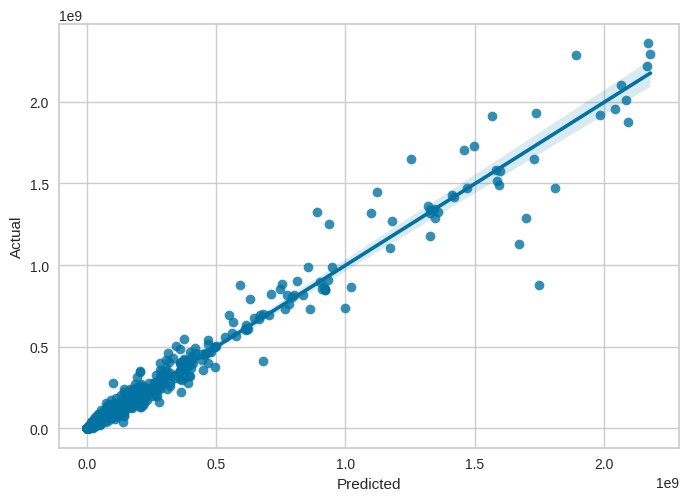

In [ ]:
plot = sns.regplot(x=Y_pred, y=Y_test)
plot.set(xlabel="Predicted", ylabel="Actual")

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Dataset.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

<Axes: >

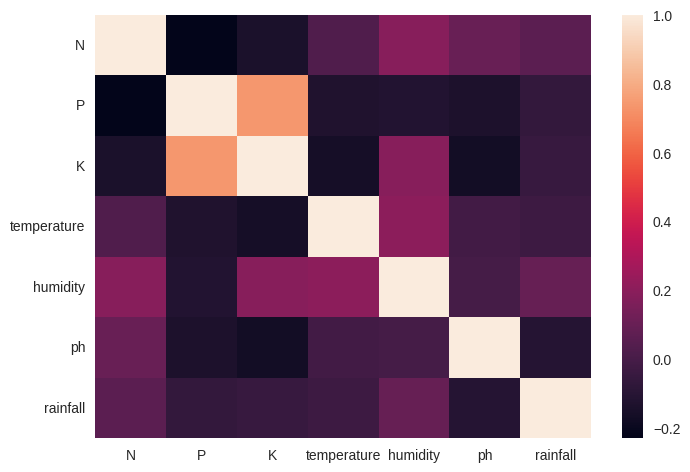

In [ ]:
sns.heatmap(X.corr())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


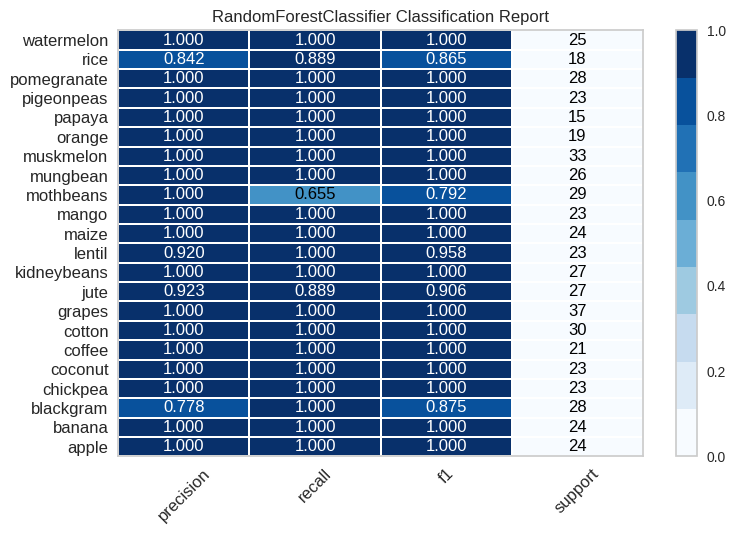

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()